In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Feature Engineering

In [4]:
df.drop(['loan_id'],inplace=True,axis=1)

In [5]:
print(df.shape)

(4269, 12)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


### As bank assets, luxury assets are movable assets so we will put that in same col by combining them And residential assets, commercial assets are immovable assets so we will combine both this cols

In [7]:
df['Movable_Assets'] = df[' bank_asset_value']+df[' luxury_assets_value']
df['Immovable_Assets'] = df[' residential_assets_value']+df[' commercial_assets_value']

### Now we will drop bank_asset_value, luxury_assets_value, residentail_assets_value and commercial_assets_value cols

In [8]:
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ],inplace=True)

In [9]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_Assets,Immovable_Assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [10]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score', ' loan_status',
       'Movable_Assets', 'Immovable_Assets'],
      dtype='object')

In [11]:
df[' no_of_dependents'].nunique()

6

In [12]:
df[' no_of_dependents'].value_counts()

4    752
3    727
0    712
2    708
1    697
5    673
Name:  no_of_dependents, dtype: int64

In [13]:
df[' education'].nunique()

2

In [14]:
df[' education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64

In [15]:
df[' self_employed'].nunique()

2

In [16]:
df[' self_employed'].value_counts()

 Yes    2150
 No     2119
Name:  self_employed, dtype: int64

In [17]:
df[' income_annum'].nunique()

98

In [18]:
df[' income_annum'].value_counts()

7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name:  income_annum, Length: 98, dtype: int64

In [19]:
df[' loan_amount'].nunique()

378

In [20]:
df[' loan_amount'].value_counts()

10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800000     1
36100000     1
Name:  loan_amount, Length: 378, dtype: int64

In [21]:
df[' loan_status'].nunique()

2

In [22]:
df[' loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64

In [23]:
df[' loan_term'].nunique()

10

In [24]:
df[' loan_term'].value_counts()

6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name:  loan_term, dtype: int64

In [25]:
df[' cibil_score'].nunique()

601

In [26]:
df[' cibil_score'].value_counts()

348    16
543    15
538    15
778    14
509    14
       ..
334     2
773     2
893     2
484     2
864     1
Name:  cibil_score, Length: 601, dtype: int64

# Data Cleaning

In [27]:
df.isnull().sum()

 no_of_dependents    0
 education           0
 self_employed       0
 income_annum        0
 loan_amount         0
 loan_term           0
 cibil_score         0
 loan_status         0
Movable_Assets       0
Immovable_Assets     0
dtype: int64

In [28]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_Assets,Immovable_Assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0    no_of_dependents  4269 non-null   int64 
 1    education         4269 non-null   object
 2    self_employed     4269 non-null   object
 3    income_annum      4269 non-null   int64 
 4    loan_amount       4269 non-null   int64 
 5    loan_term         4269 non-null   int64 
 6    cibil_score       4269 non-null   int64 
 7    loan_status       4269 non-null   object
 8   Movable_Assets     4269 non-null   int64 
 9   Immovable_Assets   4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


### Here there are no null values in any of the features

# Exploratory Data Analysis(EDA)

### No of Dependents

Text(0.5, 1.0, 'Number of Dependents')

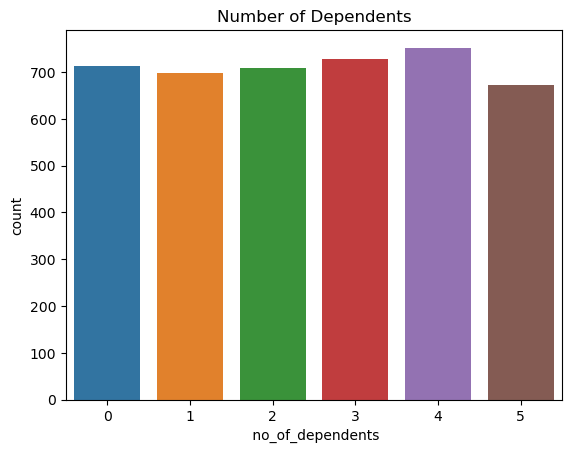

In [30]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

### Number Of Dependent VS Loan Status

<Axes: xlabel=' no_of_dependents', ylabel='count'>

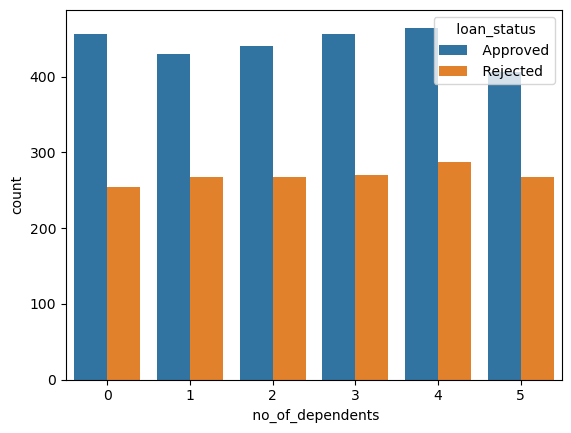

In [31]:
sns.countplot(x=' no_of_dependents',data=df,hue=' loan_status')

#### Through this graph we understand that loan rejection or approve does not depend on the numbers of dependents

<Axes: xlabel=' self_employed', ylabel='count'>

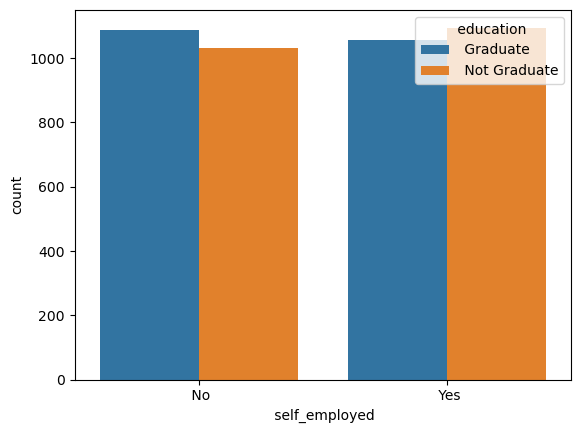

In [32]:
sns.countplot(x=' self_employed',data=df,hue=' education')

### Loan Status VS Education

<Axes: xlabel=' education', ylabel='count'>

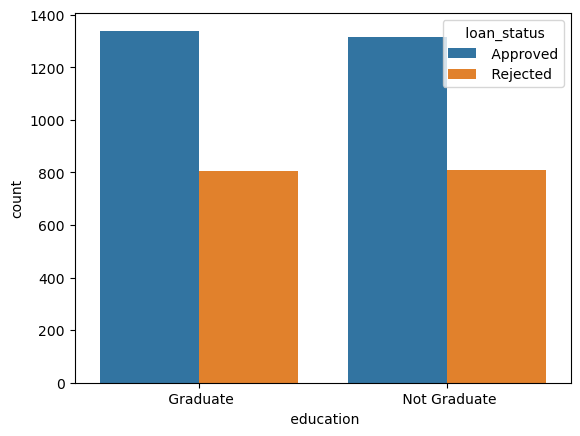

In [33]:
sns.countplot(x=' education',data=df,hue=' loan_status')

### There is not much change in the loan apporval or rejection whether applicant is graducated or not graducated

### Cibil Score Distribution

<Axes: xlabel=' cibil_score', ylabel='Count'>

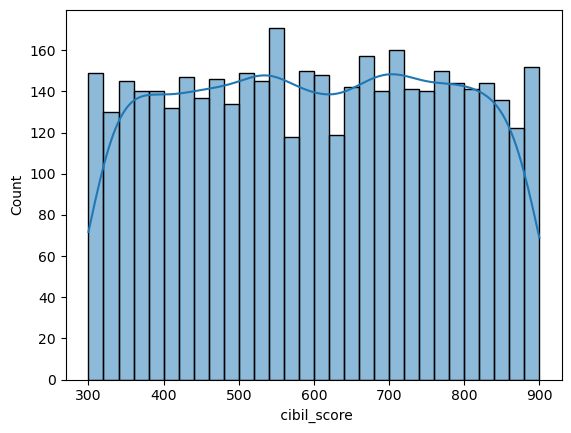

In [34]:
sns.histplot(df[" cibil_score"],bins=30, kde=True)

### Loan Status VS Movable Assets

<Axes: xlabel='Movable_Assets', ylabel='Count'>

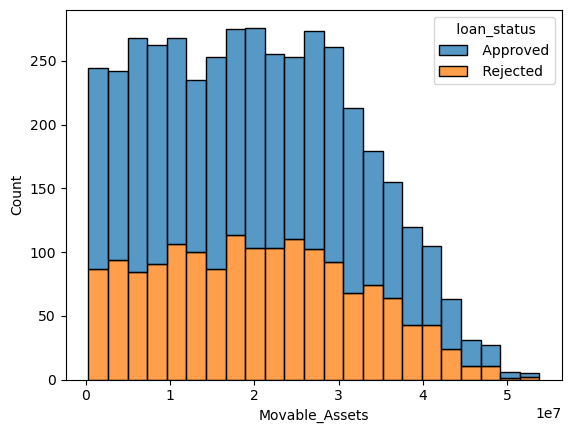

In [35]:
sns.histplot(x='Movable_Assets',data=df,hue=' loan_status',multiple='stack')

### Loan Status VS Immovable Assets

<Axes: xlabel='Immovable_Assets', ylabel='Count'>

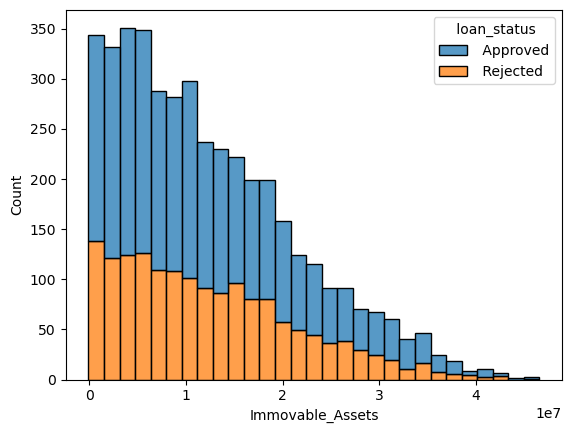

In [36]:
sns.histplot(x='Immovable_Assets',data=df,hue=' loan_status',multiple='stack')

# Data Preprocessing

### Label Encoding The Categorical Features

In [37]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_Assets,Immovable_Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


In [38]:
df[' education'] = df[' education'].replace({' Not Graduate':0,' Graduate':1})

In [39]:
df[' self_employed'] = df[' self_employed'].replace({' No':0,' Yes':1})

In [40]:
df[' loan_status'] = df[' loan_status'].replace({' Rejected':0,' Approved':1})

In [41]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_Assets,Immovable_Assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


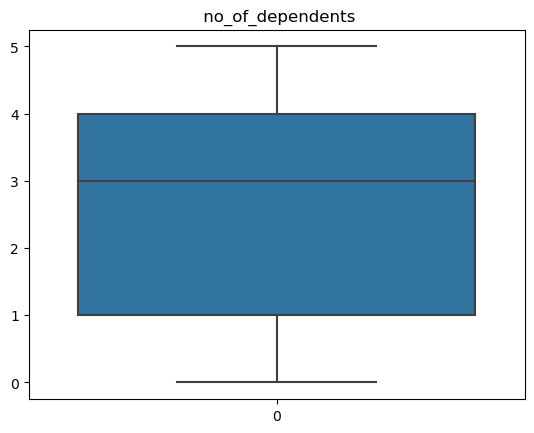

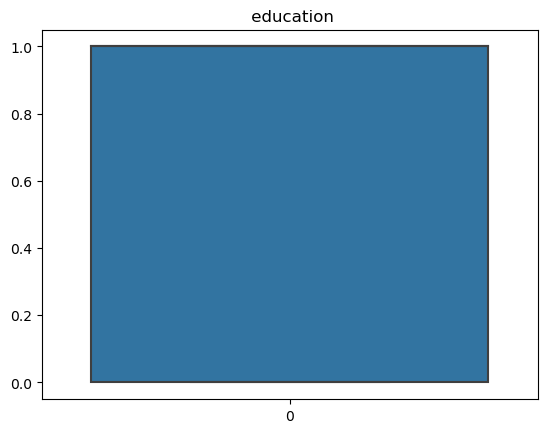

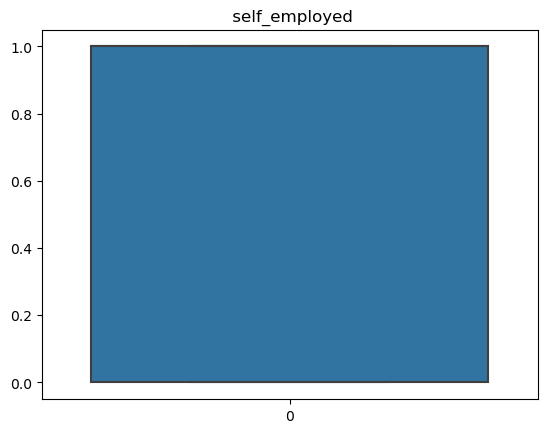

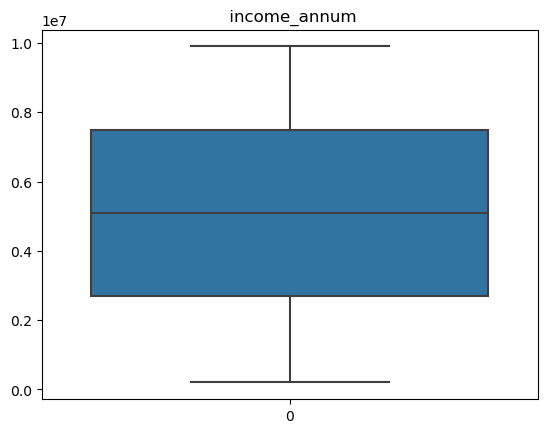

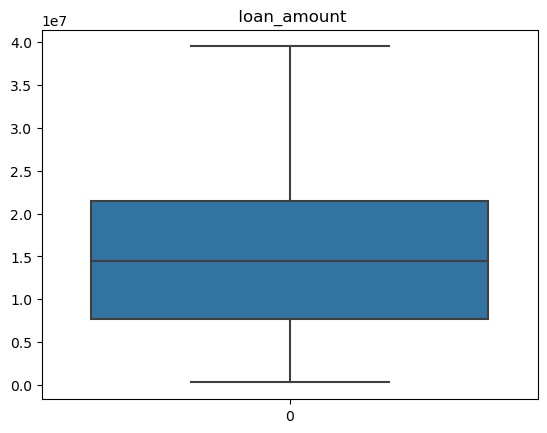

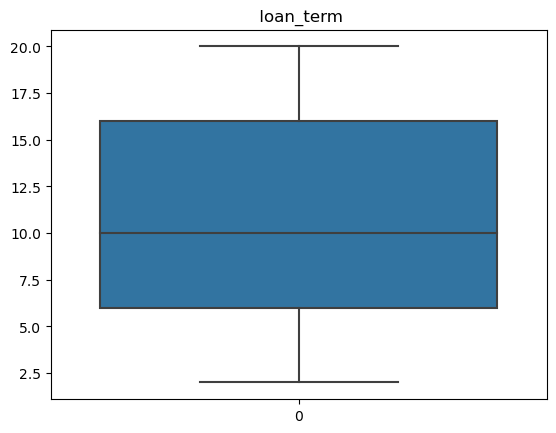

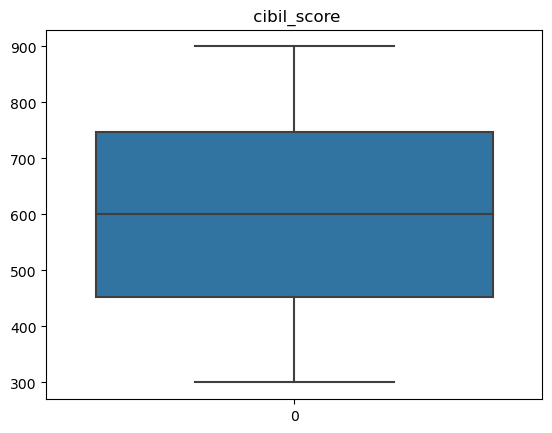

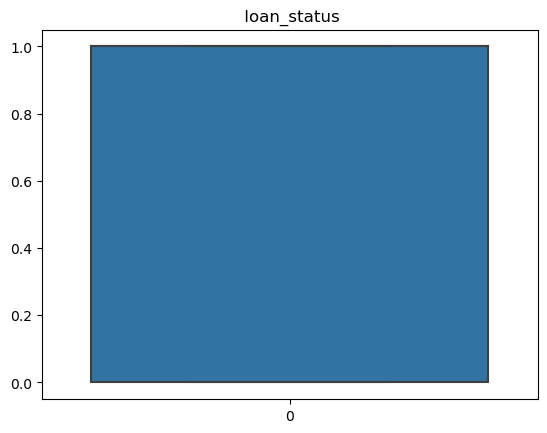

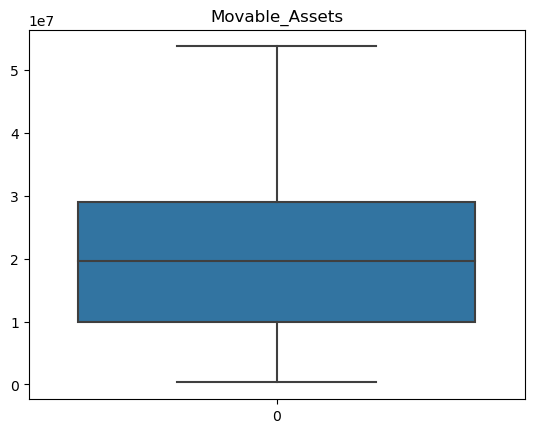

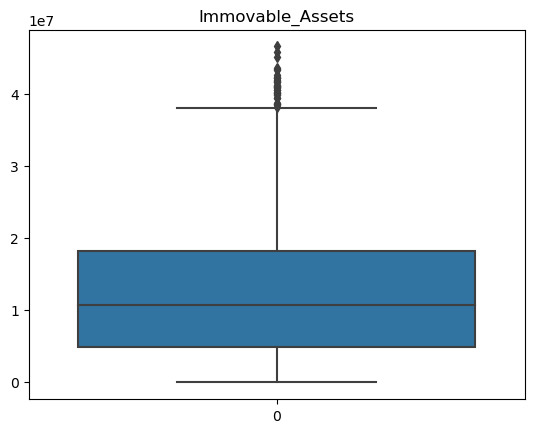

In [42]:
for col in df.columns:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show()

In [43]:
cor = df.corr()

In [44]:
cor

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_Assets,Immovable_Assets
no_of_dependents,1.000000,0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,-0.018114,0.005232,0.004468
education,0.002697,1.000000,-0.023224,0.011625,0.010631,-0.008417,-0.004649,0.004918,0.012179,0.004485
self_employed,0.000765,-0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.000345,0.003335,-0.004228
income_annum,0.007266,0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,-0.015189,0.948324,0.753006
loan_amount,-0.003366,0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.016150,0.878555,0.705592
loan_term,-0.020111,-0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,-0.113036,0.014323,0.003042
cibil_score,-0.009998,-0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,0.770518,-0.026261,-0.015843
loan_status,-0.018114,0.004918,0.000345,-0.015189,0.016150,-0.113036,0.770518,1.000000,-0.013755,-0.006200
Movable_Assets,0.005232,0.012179,0.003335,0.948324,0.878555,0.014323,-0.026261,-0.013755,1.000000,0.709915
Immovable_Assets,0.004468,0.004485,-0.004228,0.753006,0.705592,0.003042,-0.015843,-0.006200,0.709915,1.000000


<Axes: >

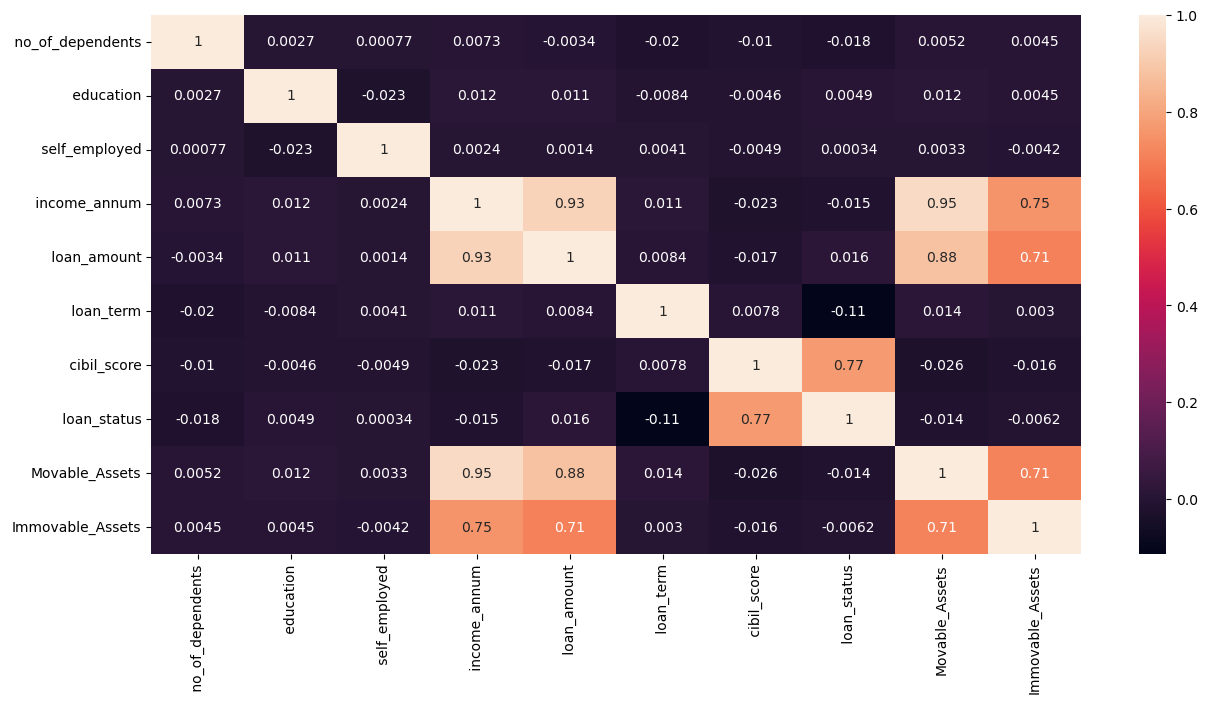

In [45]:
plt.figure(figsize=(15,7))
sns.heatmap(cor,annot=True)

In [46]:
# Here we have strong relation between Movable Assets and Immovable Assets.
# Also we have strong relation of cibil score and loan status
# Then there is strong relation between loan amount and movable assets,immovable assets

<Axes: xlabel='Movable_Assets', ylabel=' loan_amount'>

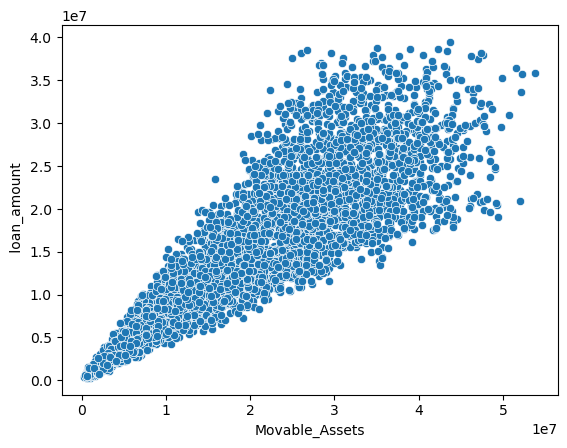

In [47]:
sns.scatterplot(x='Movable_Assets',y=' loan_amount',data=df)

#### There is positive relation between movable assets and loan amount. It can be said that people who has more assets also has more loan amount

<Axes: xlabel='Immovable_Assets', ylabel=' loan_amount'>

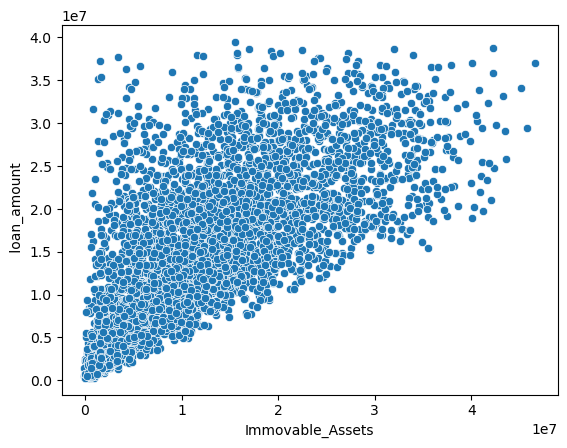

In [48]:
sns.scatterplot(x='Immovable_Assets',y=' loan_amount',data=df)

#### Also, here we have some what postivie relation between loan amount and immovable assets. It says that loan amount more then assets are more

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

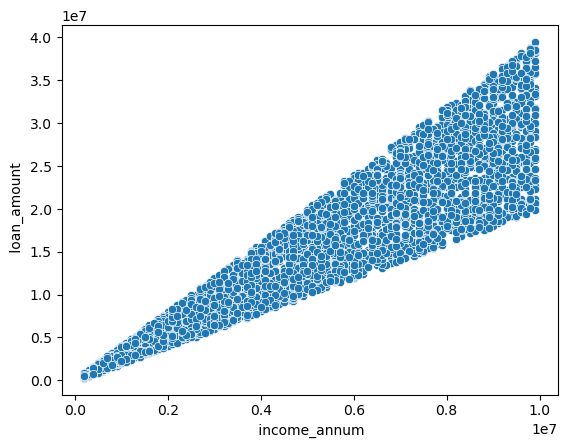

In [49]:
sns.scatterplot(x=' income_annum',y=' loan_amount',data=df)

#### Through this graph we get straight positive relation. So we can say high income then we will get high amount of loan

# Machine Learning Models

### Seperating the independent and dependent features

In [50]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score', ' loan_status',
       'Movable_Assets', 'Immovable_Assets'],
      dtype='object')

In [51]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_Assets,Immovable_Assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


In [52]:
X = df.drop([' loan_status'],axis=1)
y = df[' loan_status']

### Train Test Split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3415, 9)
(854, 9)
(3415,)
(854,)


### Logistic Regression

In [55]:
lr = LogisticRegression()

In [56]:
lr.fit(X_train,y_train)

LogisticRegression()

In [58]:
lr_predict = lr.predict(X_test)
print(lr_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [59]:
lr_accuracy = accuracy_score(y_test,lr_predict)
print(lr_accuracy)

0.6276346604215457


### Decision Tree Classifier

In [61]:
d_tree = DecisionTreeClassifier()

In [62]:
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
dtree_predict = d_tree.predict(X_test)

In [66]:
print(dtree_predict)

[0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1
 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 

In [68]:
d_tree.score(X_train, y_train)

1.0

In [69]:
dtree_accuracy = accuracy_score(y_test, dtree_predict)
print("Accuracy:", dtree_accuracy)

Accuracy: 0.9812646370023419


### Random Forest Classifier

In [71]:
rfc = RandomForestClassifier()

In [72]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [73]:
rfc_predict = rfc.predict(X_test)

In [74]:
rfc_accuracy = accuracy_score(y_test,rfc_predict)
print(rfc_accuracy)

0.9765807962529274


The Decision Tree and Random Forest gives best accuracy score and logistic regression does not gave proper accuracy. 
The accuracy of Decision Tree is 98.1% and accuracy of Random Forest is 97.6%. 

### Create Pickle File

In [77]:
filename = 'loanapproval_model.pkl'
pickle.dump(d_tree, open(filename, 'wb'))